# Data Mining A1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

## Data Exploration

In [4]:
colnames = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country","income"
]
df_train = pd.read_csv('dataset/adult.data', index_col=False, header=None, names=colnames, na_values='?', skipinitialspace=True)
df_test = pd.read_csv('dataset/adult.test', index_col=False, header=None, names=colnames, skiprows=1, na_values='?', skipinitialspace=True)

df0_train=df_train.copy()
df0_test=df_test.copy()

In [5]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df_train.shape, df_test.shape

((32561, 15), (16281, 15))

In [7]:
df_train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

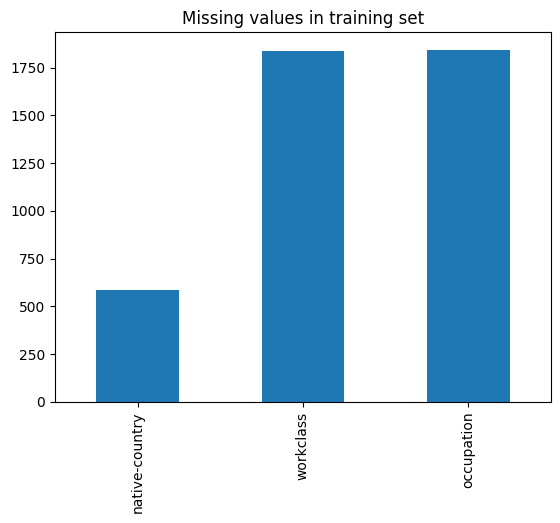

In [8]:
missing_value_train = df_train.isnull().sum()
missing_value_train = missing_value_train[missing_value_train > 0]
missing_value_train.sort_values(inplace=True)
missing_value_train.plot.bar()
plt.title('Missing values in training set')
plt.show()

Since the number of missing values is very small, we can drop those rows.


In [9]:
df_train = df_train.dropna()
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

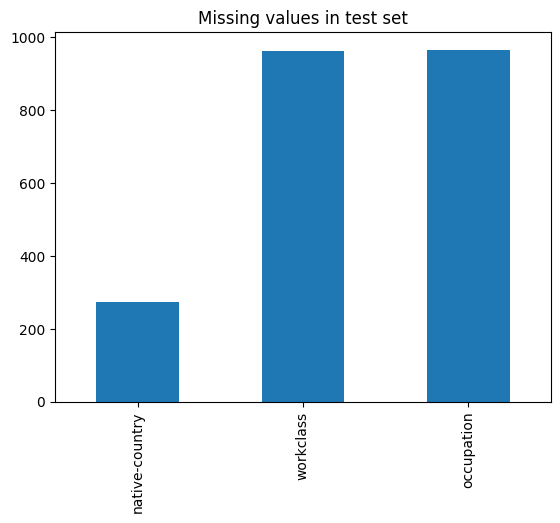

In [10]:
missing_values_test = df_test.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
missing_values_test.sort_values(inplace=True)
missing_values_test.plot.bar()
plt.title('Missing values in test set')
plt.show()

Since the number of missing values is very small, we can drop those rows.

In [11]:
df_test = df_test.dropna()
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

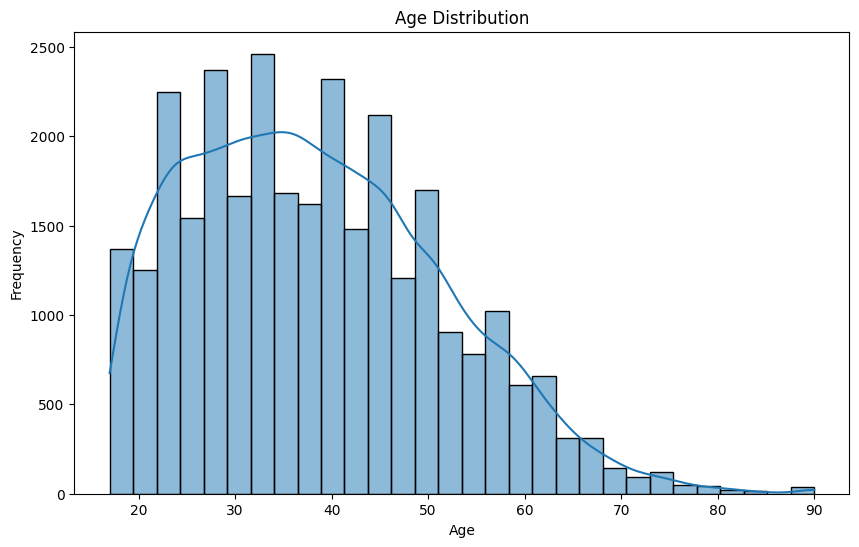

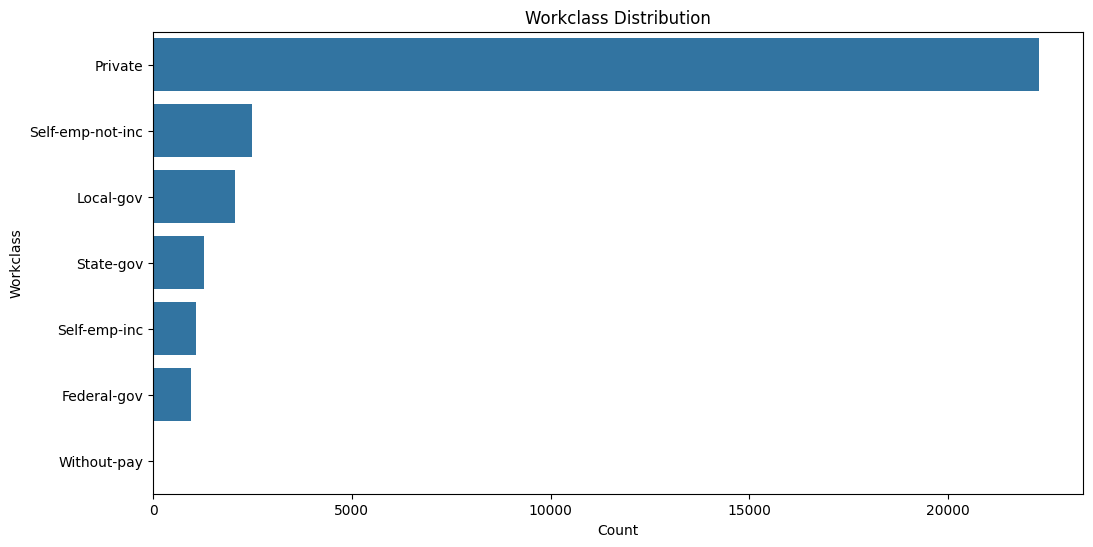

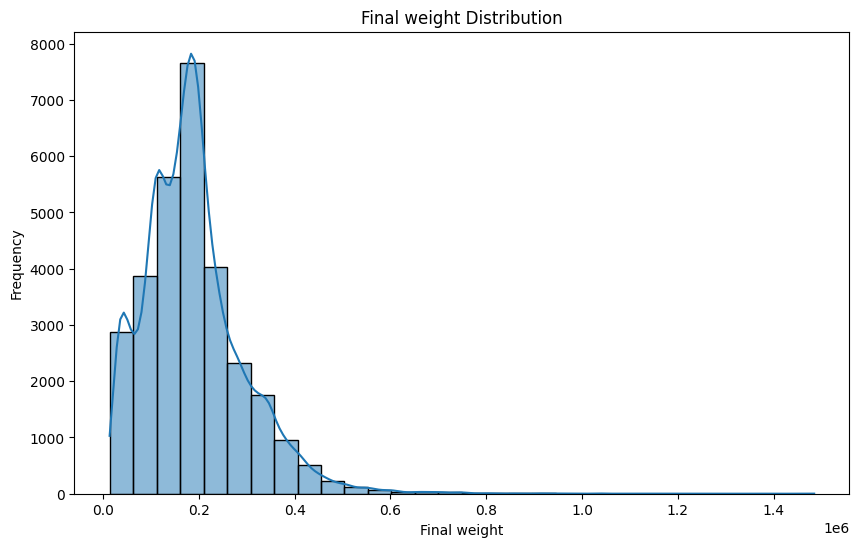

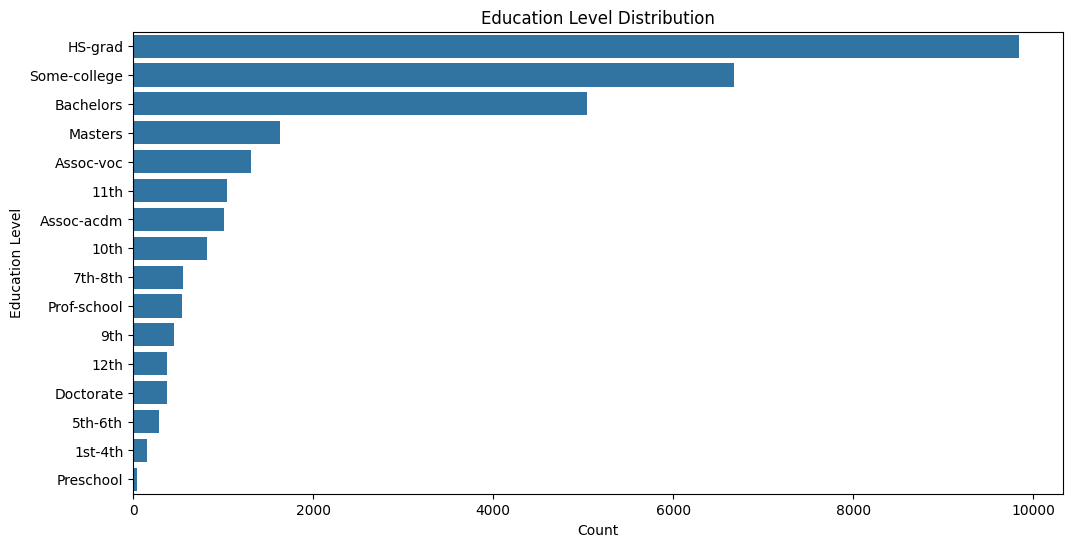

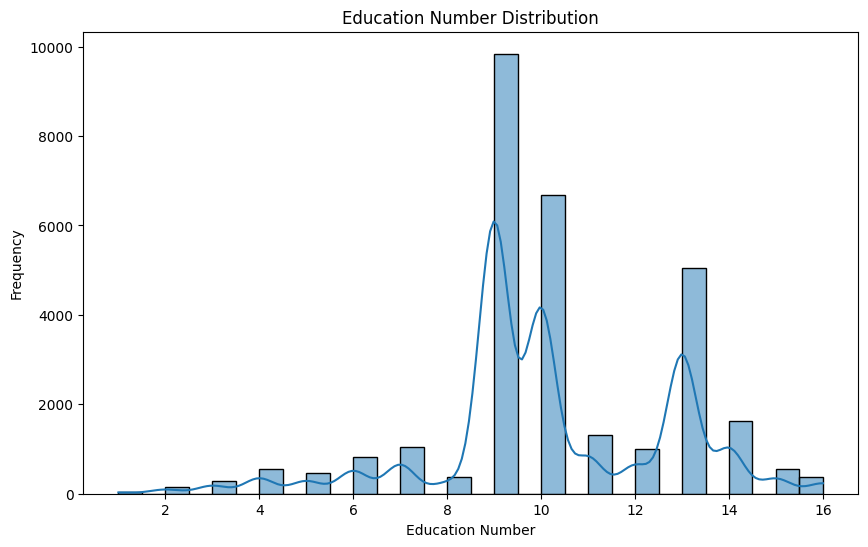

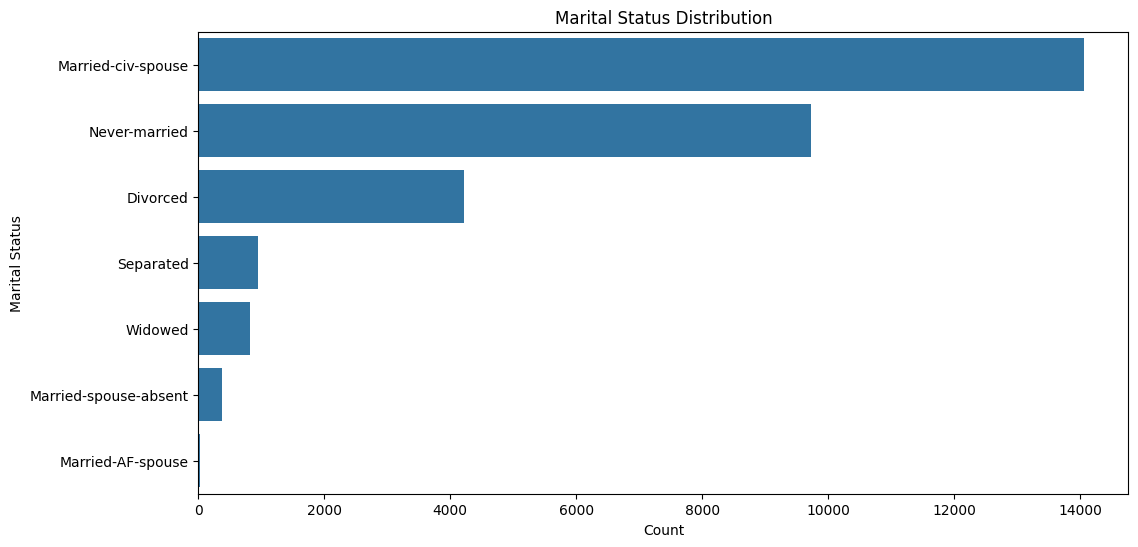

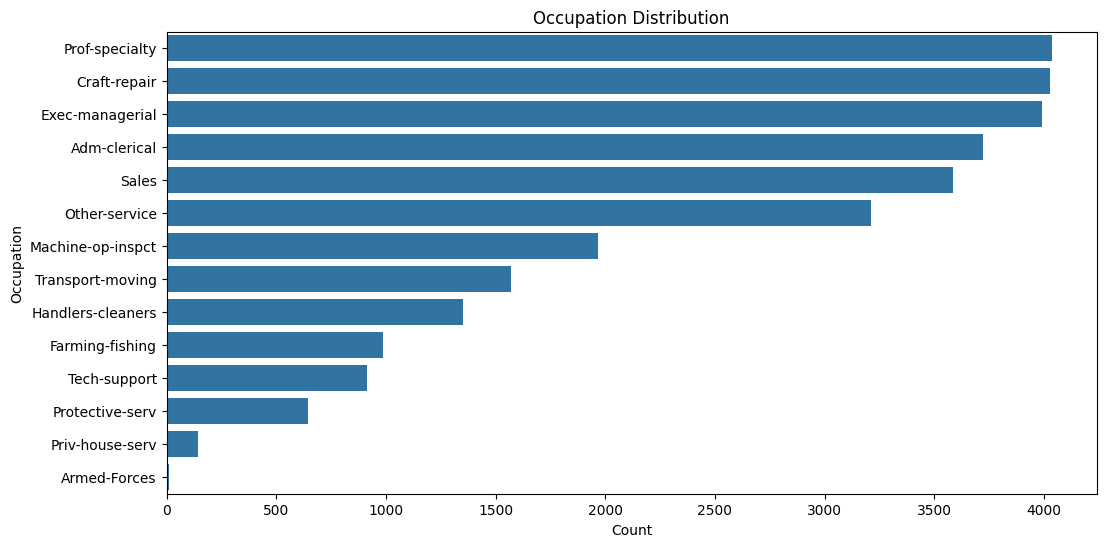

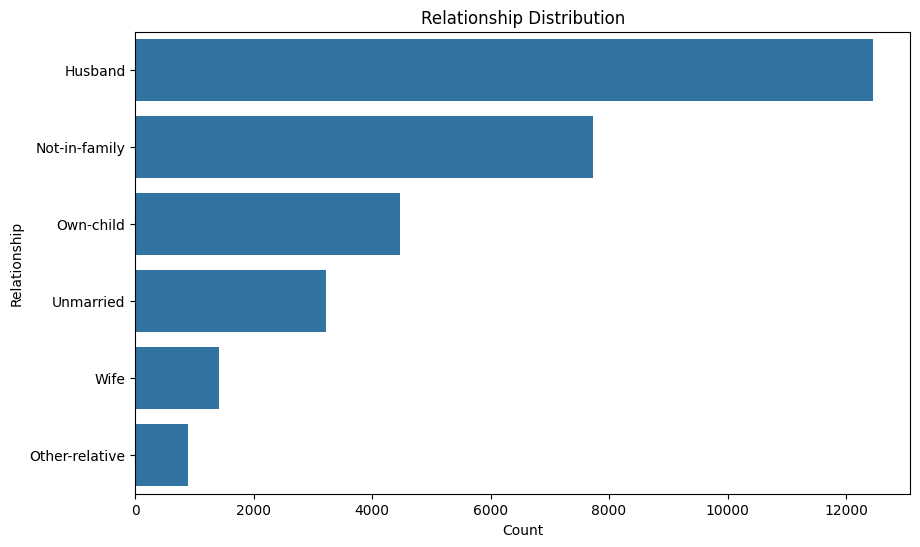

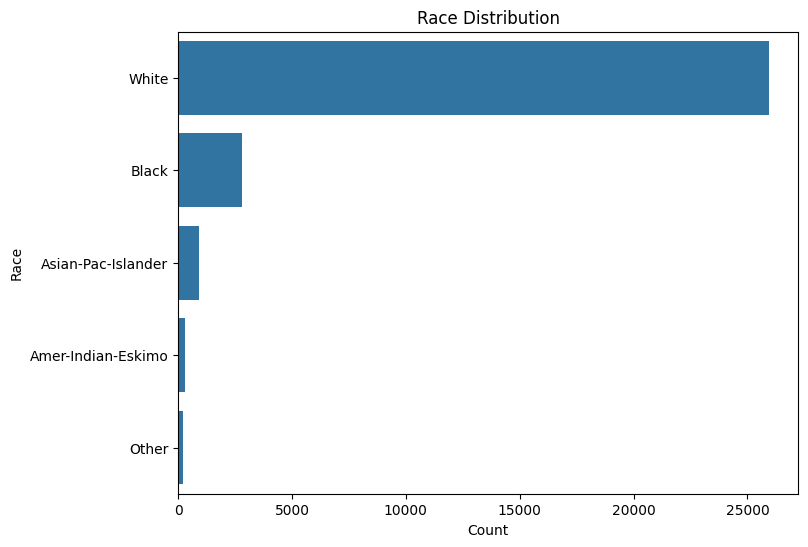

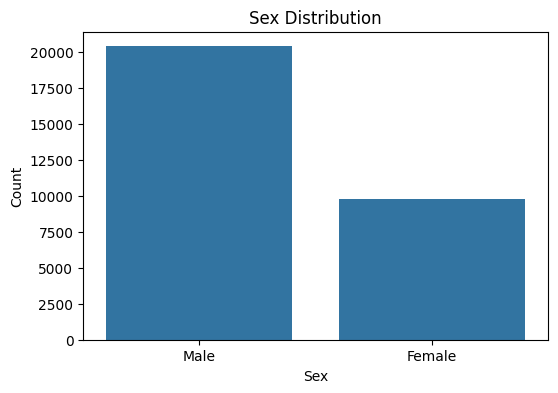

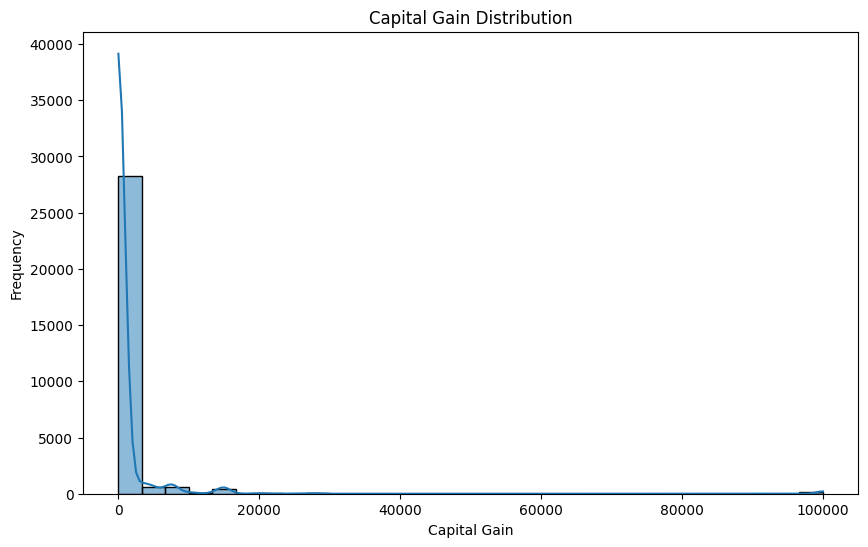

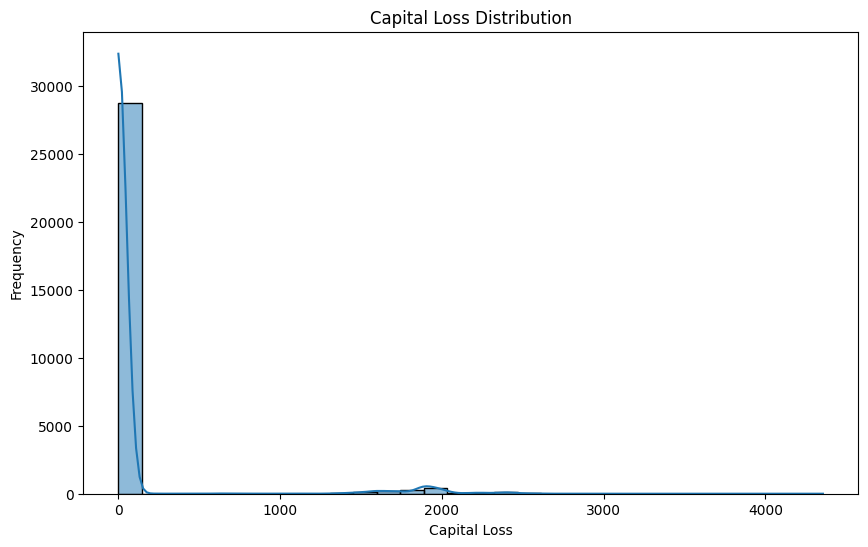

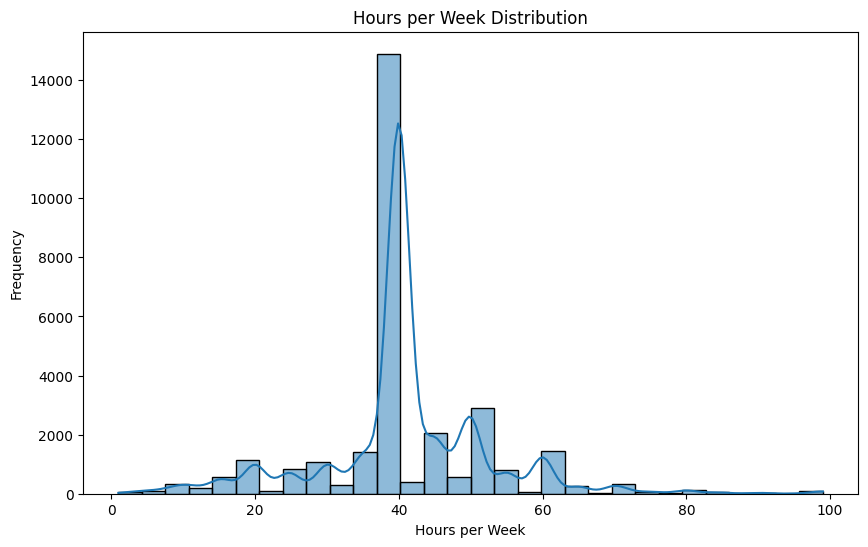

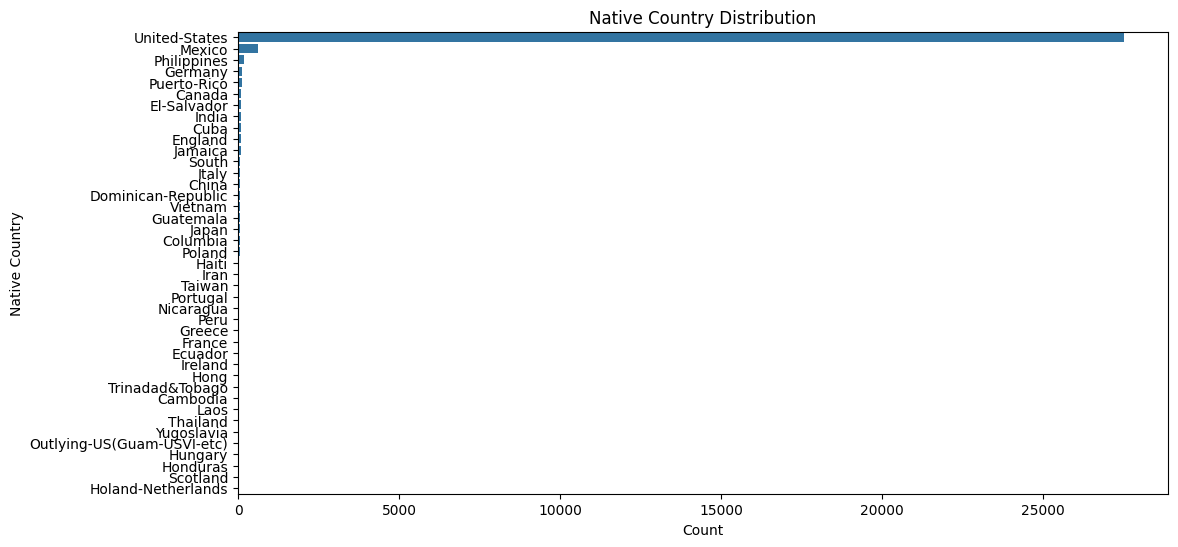

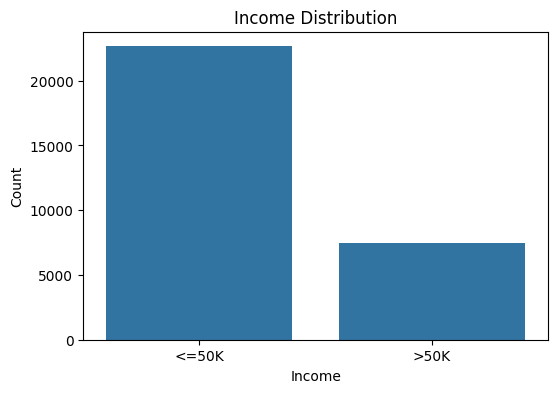

In [12]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Workclass Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', data=df_train, order=df_train['workclass'].value_counts().index)
plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()
#Final weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['fnlwgt'], bins=30, kde=True)
plt.title('Final weight Distribution')
plt.xlabel('Final weight')
plt.ylabel('Frequency')
plt.show()
#Education Level Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df_train, order=df_train['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()
#Education Number Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['education-num'], bins=30, kde=True)
plt.title('Education Number Distribution')
plt.xlabel('Education Number')
plt.ylabel('Frequency')
plt.show()
#Marital Status Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='marital-status', data=df_train, order=df_train['marital-status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()
#Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=df_train, order=df_train['occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()
#Relationship Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='relationship', data=df_train, order=df_train['relationship'].value_counts().index)
plt.title('Relationship Distribution')
plt.xlabel('Count')
plt.ylabel('Relationship')
plt.show()
#Race Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='race', data=df_train, order=df_train['race'].value_counts().index)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()
#Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df_train)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()
#Capital Gain Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['capital-gain'], bins=30, kde=True)
plt.title('Capital Gain Distribution')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()
#Capital Loss Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['capital-loss'], bins=30, kde=True)
plt.title('Capital Loss Distribution')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.show()
#Hours per Week Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['hours-per-week'], bins=30, kde=True)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()
#Native Country Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='native-country', data=df_train, order=df_train['native-country'].value_counts().index)
plt.title('Native Country Distribution')
plt.xlabel('Count')
plt.ylabel('Native Country')
plt.show()
#Income Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df_train)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()



Among the EDA process, some columns are worth noting. 
- Native Country: a great majority samples in the training set are Americans
- Capital Loss: a trenmendous number of samples with 0 capital loss
- Capital Gain: similarly, a lot of the samples with 0 capital gain
- Race: most of the samples are white, black and asian-pacific, while Amer-Indian-Eskimos and other races only take up a small percentage. 

Treatment
- Native Country: When an attribute exhibits extreme imbalance, it may adversely affect the model's performance on samples dose not fit in the main category. However, country is considered as an important attribute that cannot be ignored. Therefore, this column will be dropped to avoid model bias and over fitting based on American training samples. 
- Capital state: Since capital gain and loss is basically one category, it is decided that these two attributes can be combine into one column: Capital Gain - Capital Loss = Capital Net. Furthermore, it can be discreted into three categories: 'Positive' as 1, 'Negative' as -1,and 'None' as 0, providing clearer suggestions to the labelling class. 
- Race: While black and asian-pacific categories both contain sufficient samples, they will be kept. However, since Amer-Indian-Eskimos and the other categories both contain very less samples comparing with others, their relationship with income, the label, will be examined and will then be decided whether they need to be merged. 

Label
- The label data "Income" is not exactlly considered totally balanced as approximately 75% of samples int he training set are samples with low income. Therefore during evaluation we cannot rely solely on accuracy. 

## Feature Engineering

In [13]:
#dropping column 'native-country'
df_train = df_train.drop('native-country', axis=1)
df_test = df_test.drop('native-country', axis=1)

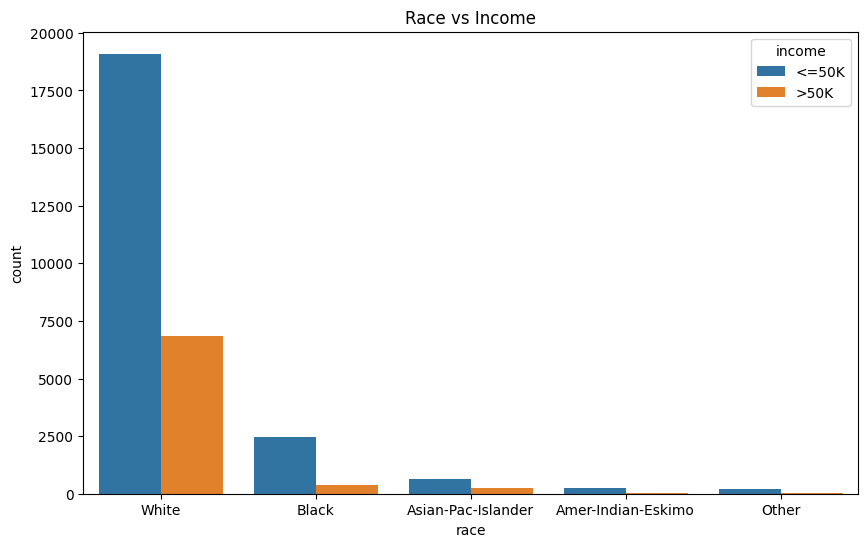

In [14]:
#race vs income
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train,x='race',hue='income')
plt.title('Race vs Income')
plt.show()

As the graph shows, both Amer-Indian-Eskimo and Others does not contribute much to the income>50k label. Therefore, it is decided to merge Amer-Indian-Eskimo and Others as one category "Others". 

In [15]:
#Treatment

#Race - marging "Amer-Indian-Eskimo" and "Other" as "Others"
df_train['race'] = df_train['race'].replace({'Amer-Indian-Eskimo': 'Others', 'Other': 'Others'})
df_test['race'] = df_test['race'].replace({'Amer-Indian-Eskimo': 'Others', 'Other': 'Others'})

In [16]:
#Capital-gain and Capital-loss - converting to descreted capital net status
df_train['CapitalNet'] = df_train['capital-gain'] - df_train['capital-loss']
df_test['CapitalNet'] = df_test['capital-gain'] - df_test['capital-loss']
df_train['CapitalNet'] = df_train['CapitalNet'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_test['CapitalNet'] = df_test['CapitalNet'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_train = df_train.drop('capital-gain', axis=1)
df_train = df_train.drop('capital-loss', axis=1)
df_test = df_test.drop('capital-gain', axis=1)
df_test = df_test.drop('capital-loss', axis=1)

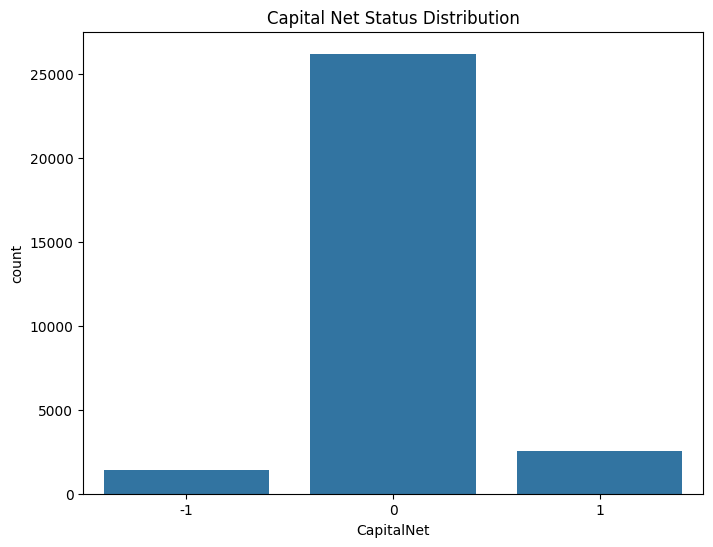

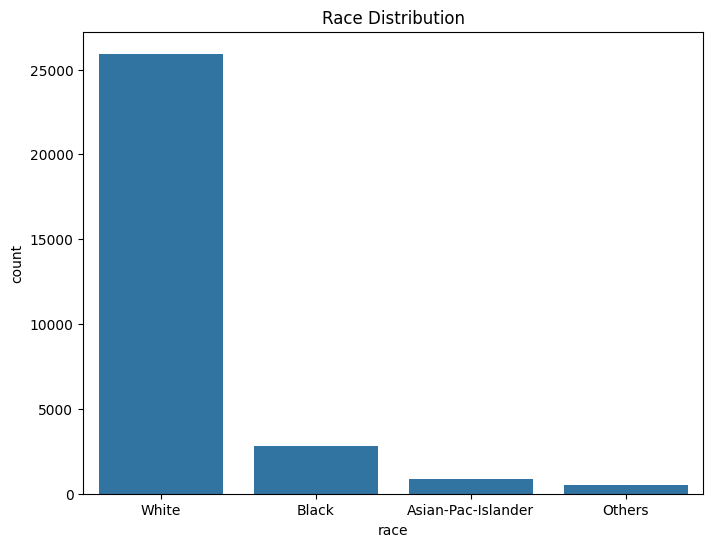

In [17]:
#distribution of capital net status
plt.figure(figsize=(8, 6))
sns.countplot(x='CapitalNet', data=df_train)
plt.title('Capital Net Status Distribution')
plt.show()

#distribution of Race
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df_train)
plt.title('Race Distribution')
plt.show()

Encoding categorical cols

In [18]:
#Noticed that in the test set, the income values have a trailing period. We need to remove that for consistency.
df_test['income'] = df_test['income'].str.replace('.', '', regex=False)

#Encoding of non numerical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','income']
for col in categorical_columns:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

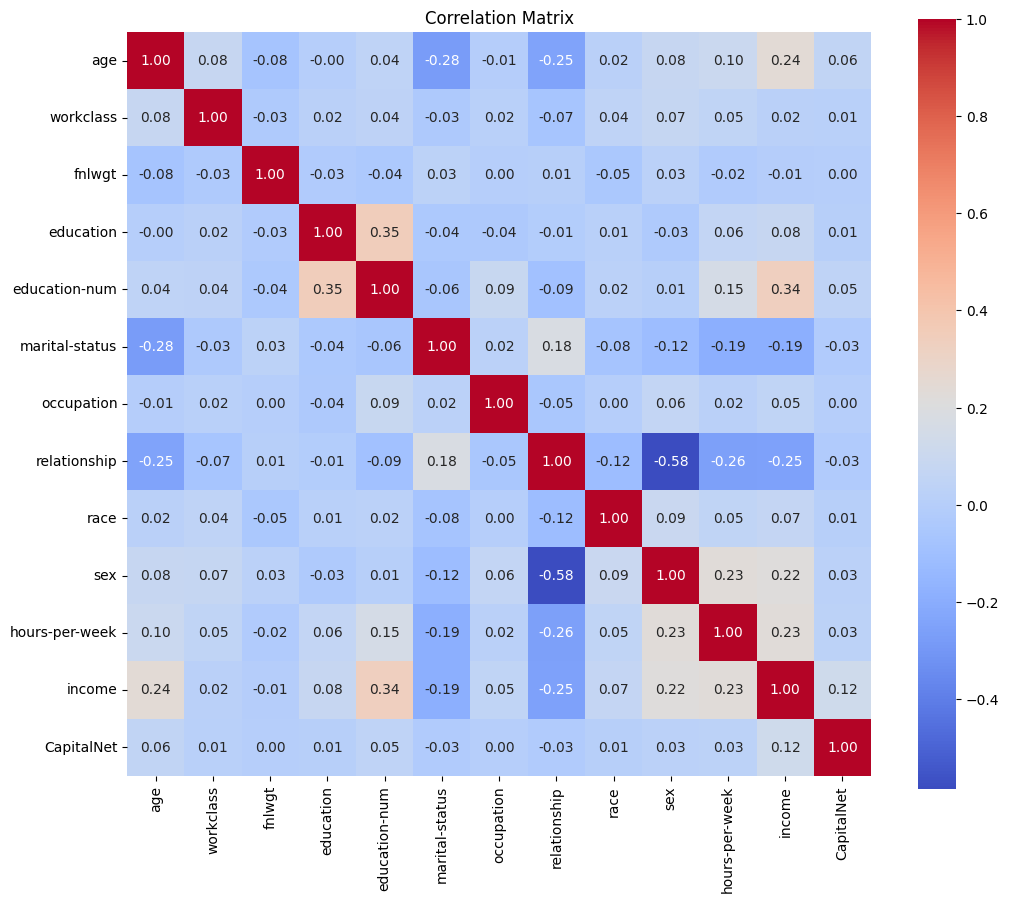

In [19]:
#Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

After encoding the features, we can take a peak at the correlations between features during the EDA process. The correlation heat map reveals some of the positively and negatively correlated features to the label "income", such as education-num, age, hours per week (positively correlated) and marital-status and relationship (negatively correlated). 

However, some other findings that may raise attention:
- sex and relationship has a strong negative correlation (-0.58)
- education and education-num has a strong positive correlation (0.35)
- age and marital-status has a strong negative correlation (-0.28)

Treaments
- As education and education-num are both measurements of education level, the column 'education' will be remove to avoid redundancy. 
- Due to several correlated features, models that assumes independencies between features will not be applicable (e.g. Naive Bayes)

In [ ]:
#Removing education as it is highly correlated with education-num
df_train = df_train.drop('education', axis=1)
df_test = df_test.drop('education', axis=1)

# Model Build-up

In [ ]:
#Splitting the data into features and target variable
X_train = df_train.drop('income', axis=1)
y_train = df_train['income']
X_test = df_test.drop('income', axis=1)
y_test = df_test['income']

# Model Build-up
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Data Mining A1
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC